<a href="https://colab.research.google.com/github/muhammadalifalfarizi/Dataset-Satelit-ML/blob/main/Final_Submission_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Muhammad Alif Alfarizi** 

#### **1494037162101-564**

 Importing necessary libraries

In [1]:
import zipfile, os
import pandas as pd
import numpy as np
import tensorflow as tf 

Setting permissions for kaggle.json file

In [2]:
! chmod 600 /content/kaggle.json 

chmod: cannot access '/content/kaggle.json': No such file or directory


Downloading the satellite image classification dataset from Kaggle

In [3]:
! KAGGLE_CONFIG_DIR=/content/ kaggle  datasets download -d mahmoudreda55/satellite-image-classification

'KAGGLE_CONFIG_DIR' is not recognized as an internal or external command,
operable program or batch file.


Specifying the local path of the downloaded dataset zip file

In [30]:
local_zip = 'C:/Users/muham/Dataset-Satelit-ML/archive.zip'

# Extracting the contents of the zip file
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


Setting the base directory for the extracted dataset

In [31]:
base_dir = '/tmp/data'

Listing the files in the base directory

In [33]:
os.listdir(base_dir)

['cloudy', 'desert', 'green_area', 'water']

Creating an ImageDataGenerator for data augmentation and preprocessing

In [34]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2)

Creating a generator for training data from the directory

In [35]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        shuffle=True,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        shuffle=True,
        class_mode='categorical',
        subset='validation')

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


Creating Sequential model and Conv2D Maxpooling Layer

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

Printing the summary of the model

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 64)      

Compiling the model with loss, optimizer, and metric

In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Creating a custom callback to stop training if accuracy exceeds 88%

In [39]:
class TestCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')> 0.88 and logs.get('val_accuracy') > 0.88):
      print("\nAkurasi telah mencapai 88%!")
      self.model.stop_training=True
callbacks = TestCallback()

 Training the model using the generators and callbacks

In [40]:
hist = model.fit(
      train_generator, 
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator, 
      verbose=2,
      callbacks=[callbacks])

Epoch 1/30
30/30 - 50s - loss: 0.9216 - accuracy: 0.5010 - val_loss: 0.5079 - val_accuracy: 0.6510 - 50s/epoch - 2s/step
Epoch 2/30
30/30 - 33s - loss: 0.6544 - accuracy: 0.6542 - val_loss: 0.6892 - val_accuracy: 0.6199 - 33s/epoch - 1s/step
Epoch 3/30
30/30 - 31s - loss: 0.5904 - accuracy: 0.6708 - val_loss: 0.5432 - val_accuracy: 0.6927 - 31s/epoch - 1s/step
Epoch 4/30
30/30 - 27s - loss: 0.5156 - accuracy: 0.6967 - val_loss: 0.5303 - val_accuracy: 0.6554 - 27s/epoch - 890ms/step
Epoch 5/30
30/30 - 24s - loss: 0.5248 - accuracy: 0.7083 - val_loss: 0.4645 - val_accuracy: 0.6980 - 24s/epoch - 809ms/step
Epoch 6/30
30/30 - 24s - loss: 0.4330 - accuracy: 0.7792 - val_loss: 0.5276 - val_accuracy: 0.7291 - 24s/epoch - 815ms/step
Epoch 7/30
30/30 - 24s - loss: 0.4078 - accuracy: 0.8135 - val_loss: 0.5468 - val_accuracy: 0.7496 - 24s/epoch - 790ms/step
Epoch 8/30
30/30 - 22s - loss: 0.5258 - accuracy: 0.7646 - val_loss: 0.4475 - val_accuracy: 0.8108 - 22s/epoch - 737ms/step
Epoch 9/30
30/30 

Plotting the model accuracy over epochs

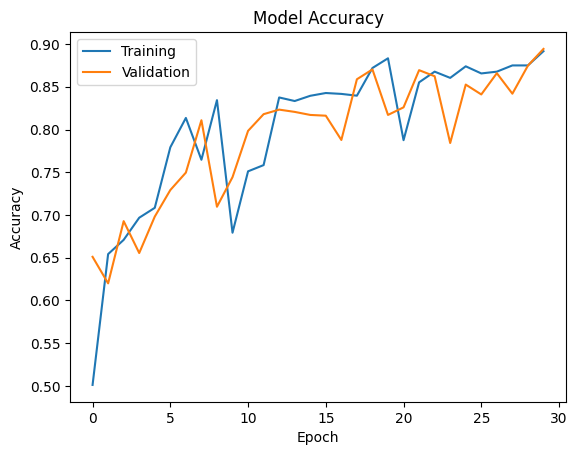

In [41]:
import matplotlib.pyplot as plt
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'], label='Training')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

Plotting the model loss over epochs

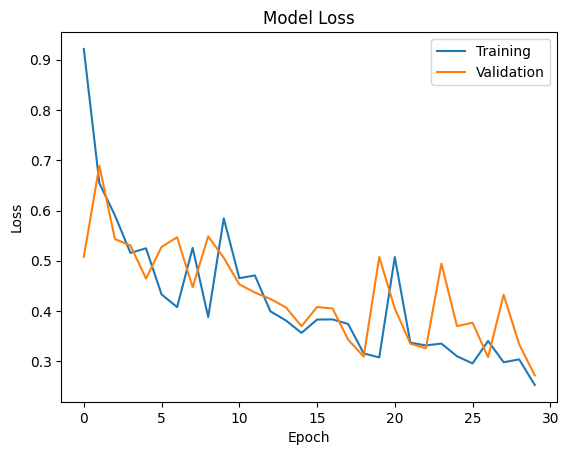

In [42]:
plt.title('Model Loss')
plt.plot(hist.history['loss'], label='Training')
plt.plot(hist.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

Predict the image

1/1 [==============================] - 0s 38ms/step
Predicted class: cloudy


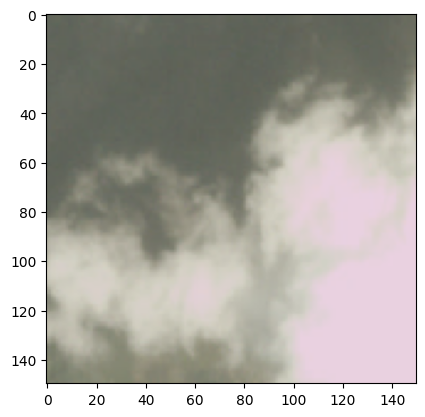

In [56]:
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = 'C:/Users/muham/Dataset-Satelit-ML/data/cloudy/train_12.jpg'

class_names = ['cloudy', 'desert', 'green area', 'water']

img = image.load_img(image_path, target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

# Make prediction
classes = model.predict(x)

predicted_class_index = np.argmax(classes[0])
predicted_class = class_names[predicted_class_index]
print('Predicted class:', predicted_class)


Converting the model to TensorFlow Lite format (.tflite)

In [57]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Saving the TensorFlow Lite model to a file
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\muham\AppData\Local\Temp\tmp83ksgzod\assets


INFO:tensorflow:Assets written to: C:\Users\muham\AppData\Local\Temp\tmp83ksgzod\assets
